# Metocean gridded spatial skill

Demonstrate plotting functionality etc by the SpatialSkill class

In [1]:
import pandas as pd
import modelskill as ms

In [2]:
fn = '../tests/testdata/NorthSeaHD_and_windspeed.dfsu'
mr = ms.model_result(fn, name='HD', item=0)
fn = '../tests/testdata/altimetry_NorthSea_20171027.csv'
df = pd.read_csv(fn, index_col=0, parse_dates=True)
o1 = ms.TrackObservation(df, item=2, name='alti')
cc = ms.match(o1, mr)

/home/jan/src/modelskill/modelskill/timeseries/_track.py:136: UserWarning: Removed 22 duplicate timestamps with keep=first
  warnings.warn(


In [3]:
gs = cc.gridded_skill()

In [4]:
gs

<SkillGrid>
Dimensions: (x: 5, y: 5)

In [5]:
gs.metrics

['n', 'bias', 'rmse', 'urmse', 'mae', 'cc', 'si', 'r2']

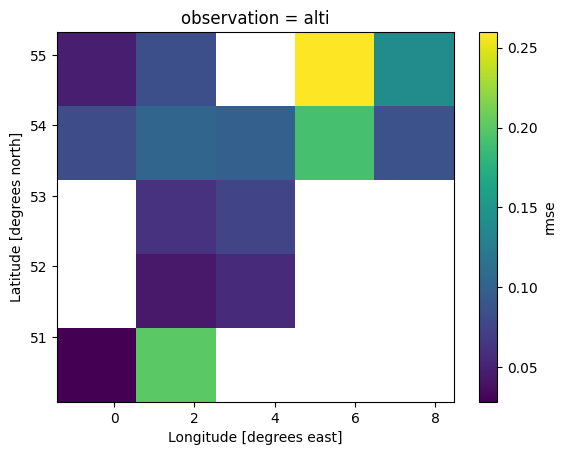

In [6]:
gs.rmse.plot();

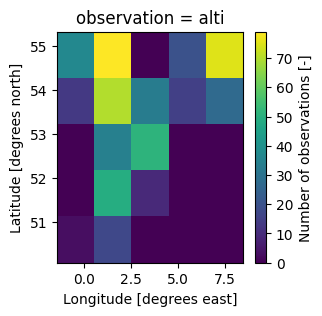

In [7]:
gs['n'].plot(figsize=(3,3));

## Multi models

In [8]:
fn = "../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu"
mr1 = ms.model_result(fn, name="SW_1", item=0)
fn = "../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu"
mr2 = ms.model_result(fn, name="SW_2", item=0)

In [9]:
o1 = ms.PointObservation("../tests/testdata/SW/HKNA_Hm0.dfs0", item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = ms.TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")
cc = ms.match(obs=[o1, o2, o3], mod=[mr1, mr2])

## gridded_skill
Group by model

In [10]:
gs = cc.gridded_skill(by='model', bins=6)

In [11]:
gs.mod_names

['SW_1', 'SW_2']

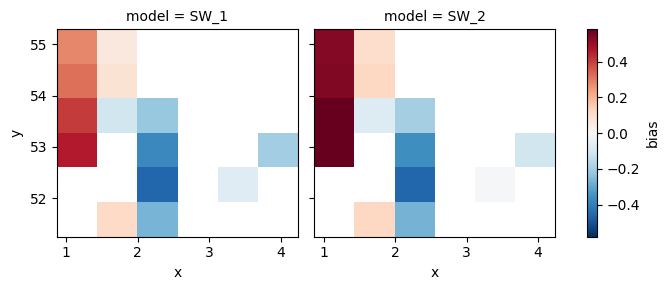

In [12]:
gs.bias.plot();

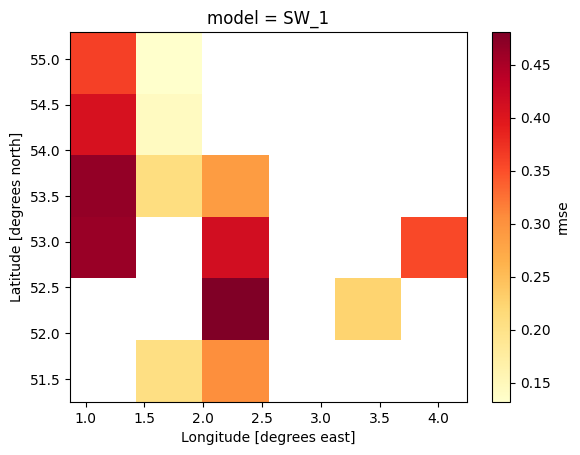

In [14]:
gs.sel(model='SW_1').rmse.plot(cmap='YlOrRd');